# Segmentation and Crop

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/My Drive/test-paper detector/detectron2

/content/drive/My Drive/test-paper detector/detectron2


In [ ]:
# torchvision 설치
!pip install -U torch torchvision
!pip install git+https://github.com/facebookresearch/fvcore.git
import torch, torchvision
torch.__version__

     |████████████████████████████████| 831.4 MB 6.8 kB/s 
     |████████████████████████████████| 22.1 MB 68 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.9.0+cu102
    Uninstalling torch-1.9.0+cu102:
      Successfully uninstalled torch-1.9.0+cu102
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.10.0+cu102
    Uninstalling torchvision-0.10.0+cu102:
      Successfully uninstalled torchvision-0.10.0+cu102
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.10.0 requires torch==1.9.0, but you have torch 1.9.1 which is incompatible.
  Cloning https://github.com/facebookresearch/fvcore.git to /tmp/pip-req-build-17sevjjd
  Running command git clone -q https://github.com/facebookresearch/fvcore.git /tmp/pip-req-build-17sevjjd
     |████████████████████████████████| 636 kB 6.3 MB/s 
  Created w

'1.9.1+cu102'

In [ ]:
# detectron2 original repo clone
%cd /content/drive/My Drive/test-paper detector/detectron2
!git clone https://github.com/facebookresearch/detectron2 detectron2_repo
!pip install -e detectron2_repo

/content/drive/My Drive/test-paper detector/detectron2
fatal: destination path 'detectron2_repo' already exists and is not an empty directory.
Obtaining file:///content/drive/My%20Drive/test-paper%20detector/detectron2/detectron2_repo
     |████████████████████████████████| 74 kB 2.0 MB/s 
     |████████████████████████████████| 145 kB 11.1 MB/s 
     |████████████████████████████████| 130 kB 42.4 MB/s 
     |████████████████████████████████| 747 kB 37.1 MB/s 
     |████████████████████████████████| 743 kB 37.0 MB/s 
     |████████████████████████████████| 112 kB 46.0 MB/s 
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-py3-none-any.whl size=141230 sha256=89aae475e17811aa76e1a15d26bdf45d50c46361fa9bf3483f112930eb7e50fb
  Stored in directory: /root/.cache/pip/wheels/ca/33/b7/336836125fc9bb4ceaa4376d8abca10ca8bc84ddc824baea6c
Successfully built antlr4-python3-runtime
  Attempting uninstall: regex
    Found existing installation: regex 2019.12.20
    Unins

In [ ]:
## 다시시작 

In [ ]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [ ]:
# coco 데이터셋에 paper 객체instance를 추가
from detectron2.data.datasets import register_coco_instances
#register_coco_instances("test-paper", {}, "./data/trainval.json", "./data/segmentation_images")
paper_metadata = MetadataCatalog.get("test-paper")
dataset_dicts = DatasetCatalog.get("test-paper")

WARNING [10/07 12:24:27 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[10/07 12:24:27 d2.data.datasets.coco]: Loaded 55 images in COCO format from ./data/trainval.json


In [ ]:
import random

for d in random.sample(dataset_dicts, 3):

    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=paper_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
import os

cfg = get_cfg()
cfg.merge_from_file("./detectron2_repo/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.DATASETS.TRAIN = ("test-paper",)
cfg.DATASETS.TEST = () 
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = "detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl" 
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.02
cfg.SOLVER.MAX_ITER = 300 
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1 

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[10/07 12:26:03 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_f10217.pkl: 178MB [00:06, 25.7MB/s]                           
Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (2, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (2,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (4, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (4,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.mask_head.predictor.weight' to the model due to i

[10/07 12:26:14 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  ../aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)


[10/07 12:26:42 d2.utils.events]:  eta: 0:06:11  iter: 19  total_loss: 0.8225  loss_cls: 0.2126  loss_box_reg: 0.278  loss_mask: 0.3089  loss_rpn_cls: 0.005484  loss_rpn_loc: 0.01969  time: 1.3246  data_time: 0.1266  lr: 0.0012854  max_mem: 2340M
[10/07 12:27:09 d2.utils.events]:  eta: 0:05:38  iter: 39  total_loss: 0.3196  loss_cls: 0.02671  loss_box_reg: 0.1795  loss_mask: 0.1104  loss_rpn_cls: 0.003198  loss_rpn_loc: 0.02689  time: 1.3264  data_time: 0.0648  lr: 0.0026174  max_mem: 2340M
[10/07 12:27:35 d2.utils.events]:  eta: 0:05:13  iter: 59  total_loss: 0.2054  loss_cls: 0.02559  loss_box_reg: 0.09577  loss_mask: 0.05808  loss_rpn_cls: 0.001786  loss_rpn_loc: 0.02039  time: 1.3233  data_time: 0.0487  lr: 0.0039494  max_mem: 2340M
[10/07 12:28:02 d2.utils.events]:  eta: 0:04:49  iter: 79  total_loss: 0.2078  loss_cls: 0.02123  loss_box_reg: 0.09119  loss_mask: 0.04938  loss_rpn_cls: 0.001867  loss_rpn_loc: 0.022  time: 1.3353  data_time: 0.0440  lr: 0.0052814  max_mem: 2340M
[10/

In [ ]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
cfg.MODEL.WEIGHTS = "/content/drive/My Drive/test-paper detector/detectron2/output/model_final.pth" 
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5 
cfg.DATASETS.TEST = ("test-paper", )
predictor = DefaultPredictor(cfg)

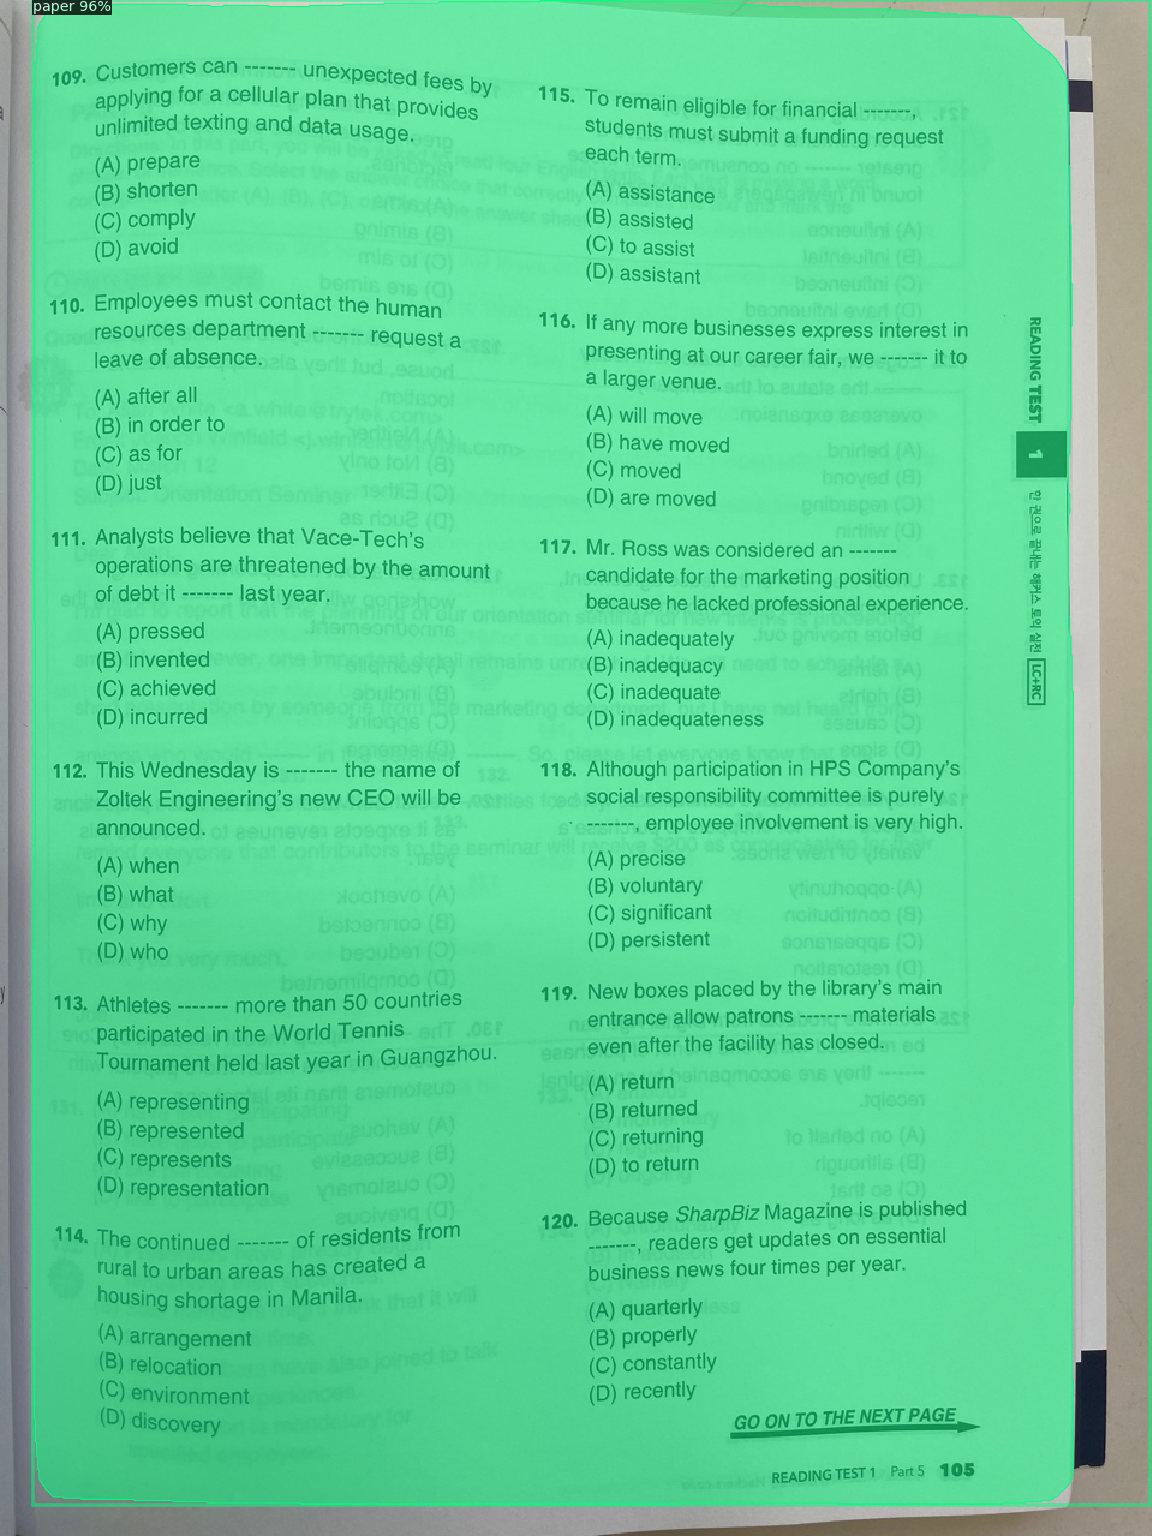

In [ ]:
path = "/content/drive/My Drive/test-paper detector/detectron2/data/segmentation_images/test/0062_seg.jpg"

im = cv2.imread(path)
outputs = predictor(im)
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])

In [ ]:
#get boxes and masks
import matplotlib.pyplot as plt 
from matplotlib import cm
ins = outputs["instances"]
pred_masks = ins.get_fields()["pred_masks"]
#boxes = ins.get_fields()["pred_boxes"]    
pred_masks

tensor([[[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]]], device='cuda:0')

In [ ]:
import tensorflow as tf
import numpy as np
from PIL import Image

## tensor to numpy
mask_array = pred_masks.cpu().numpy()

## numpy to image
mask = Image.fromarray(mask_array[0])
mask.save("/content/drive/MyDrive/test-paper detector/detectron2/data/test.jpg")

In [ ]:
img = cv2.imread("/content/drive/MyDrive/test-paper detector/detectron2/data/test.jpg")
img = 255-img # 반전

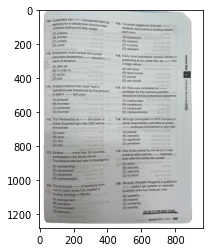

In [ ]:
from skimage.segmentation import clear_border
import skimage.morphology as mp
import scipy.ndimage.morphology as sm

## bitwise_or
img = (img*1).astype('uint8')
masked = cv2.bitwise_or(img,im) 

plt.imshow(masked)
## numpy to image
masked = Image.fromarray(masked, 'RGB')
masked.save("/content/drive/MyDrive/test-paper detector/detectron2/data/croptest.jpg")